# Top Web Services Dataset – Categorization

Service Classification
Tools         767
Financial     687
Messaging     511
eCommerce     466
Payments      460
Social        433
Enterprise    412
Mapping       362
Government    304
Telephony     300
Name: count, dtype: int64


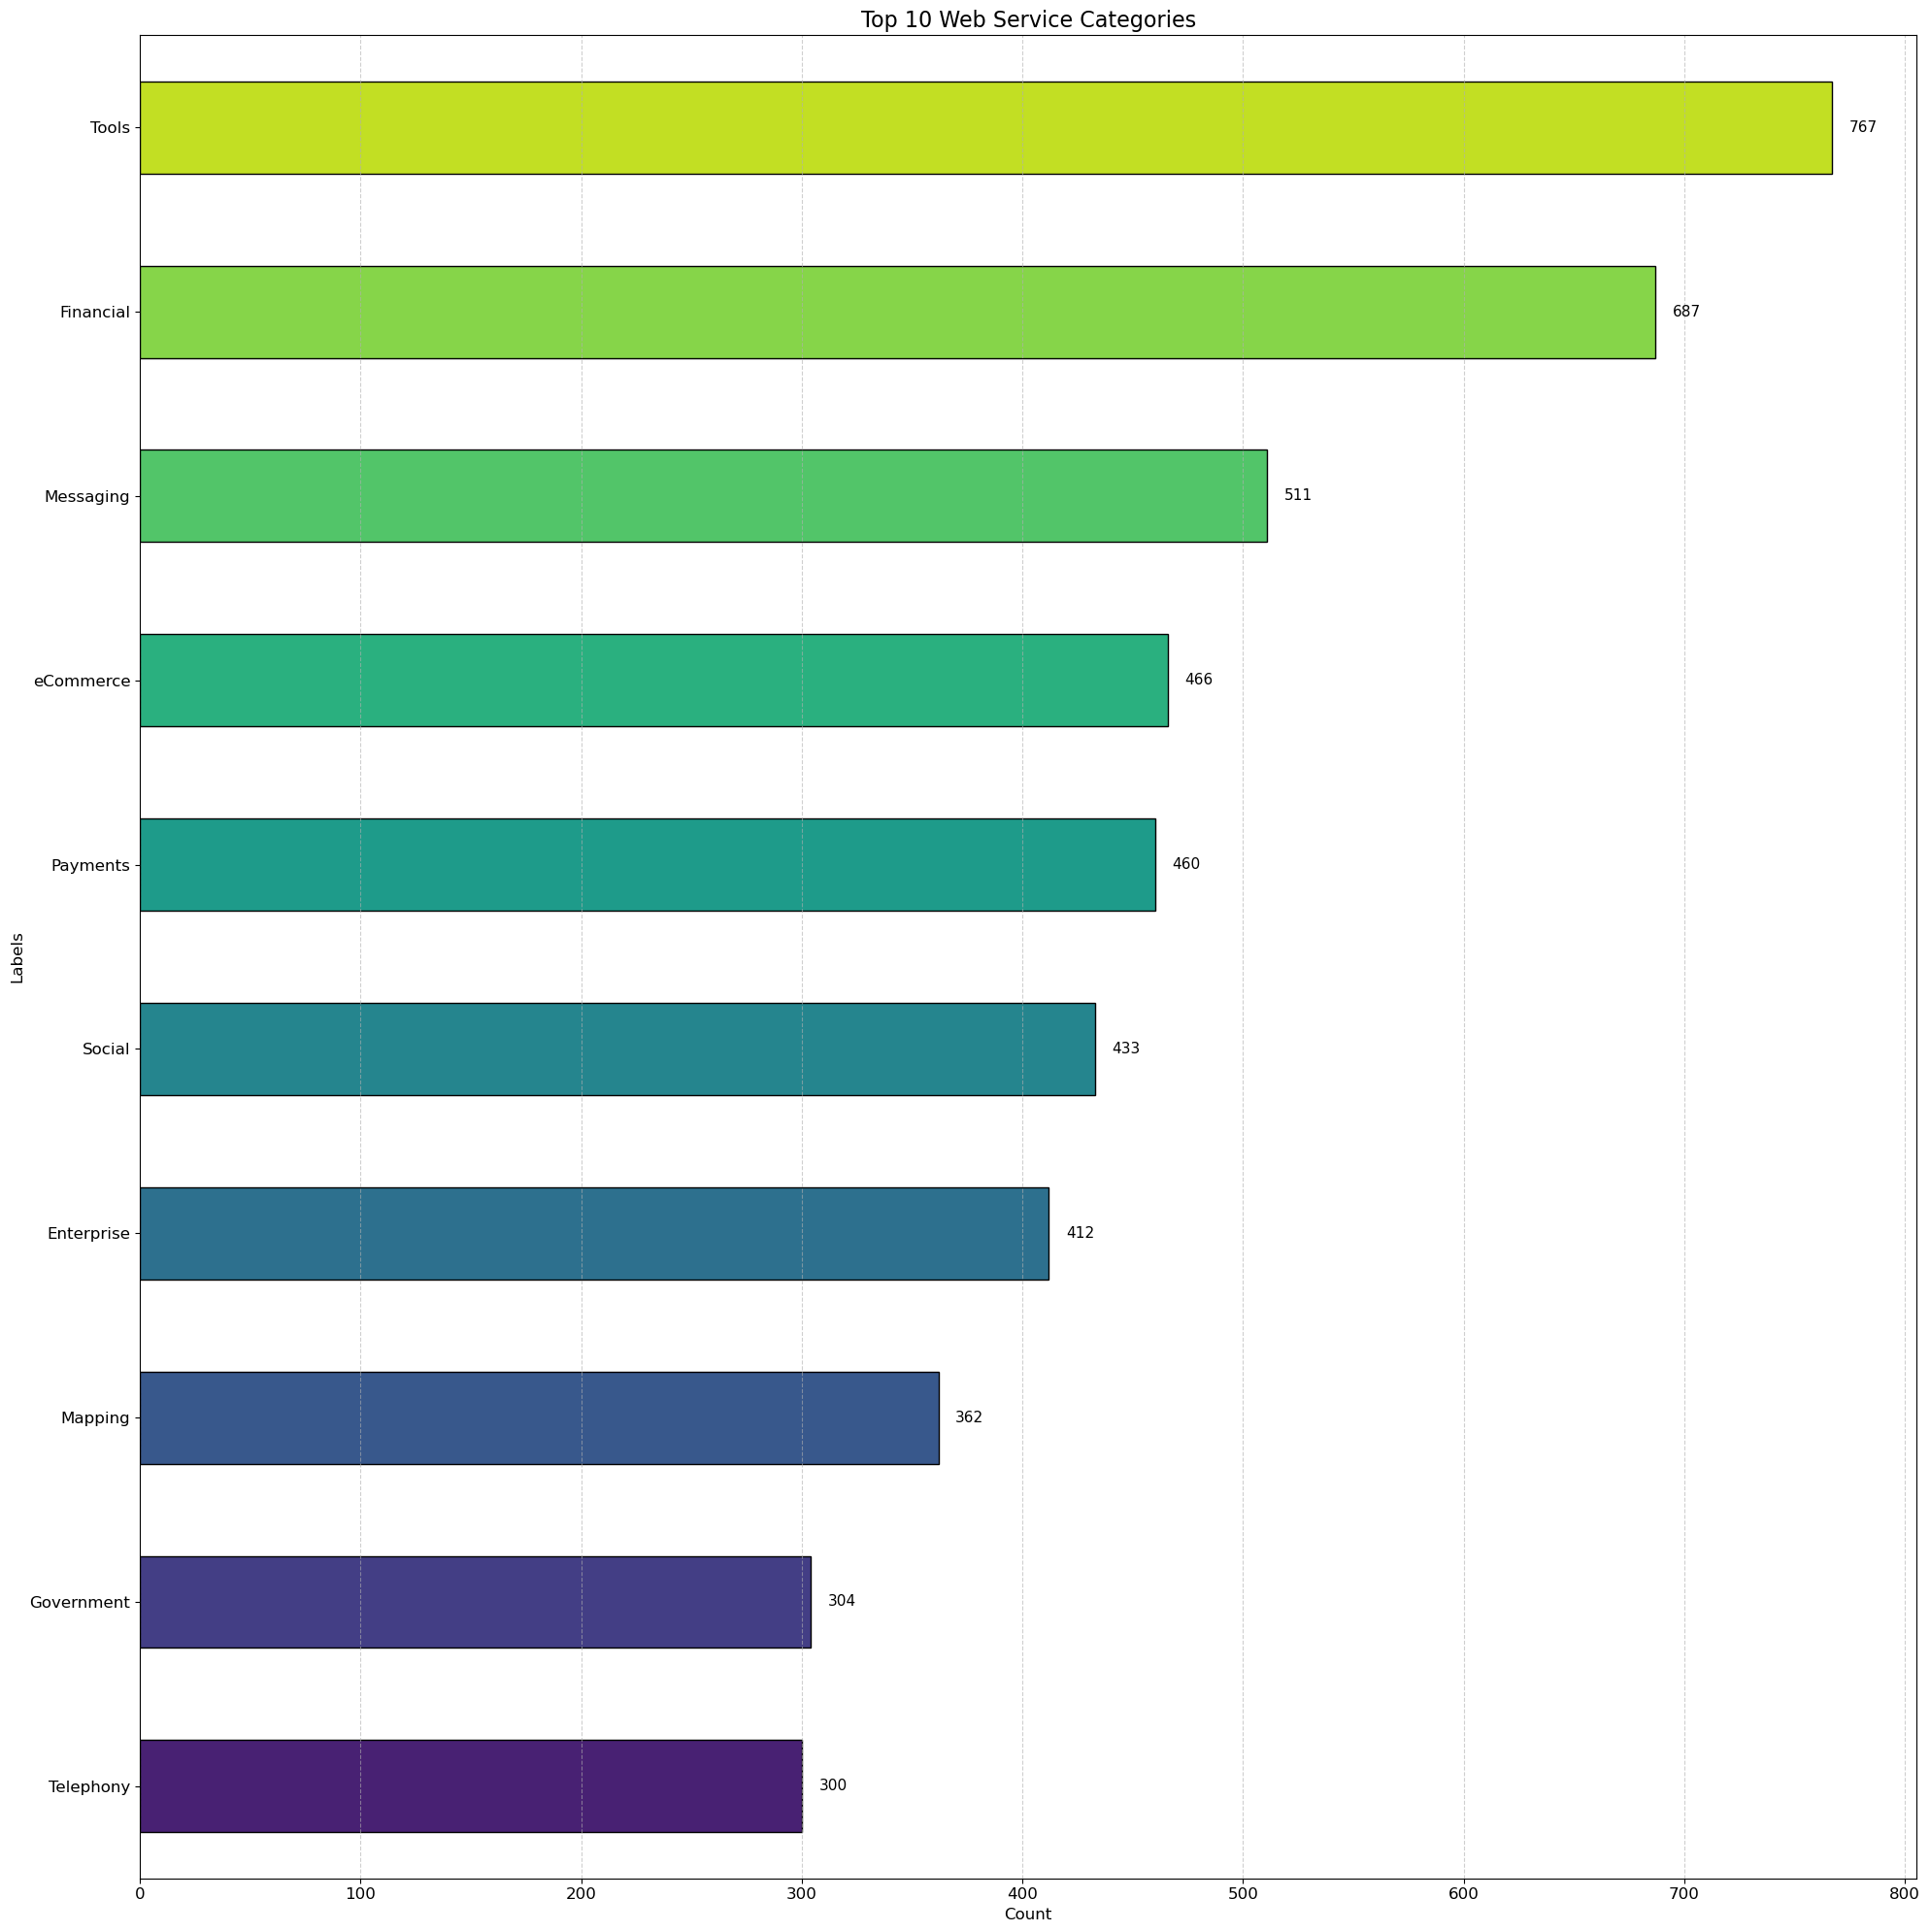

Saved Top 10 Web Service Categories CSV and plot.
Service Classification
Tools             767
Financial         687
Messaging         511
eCommerce         466
Payments          460
Social            433
Enterprise        412
Mapping           362
Government        304
Telephony         300
Science           298
Email             255
Reference         251
Search            251
Security          251
Video             251
Travel            243
Sports            228
Advertising       224
Transportation    218
Name: count, dtype: int64


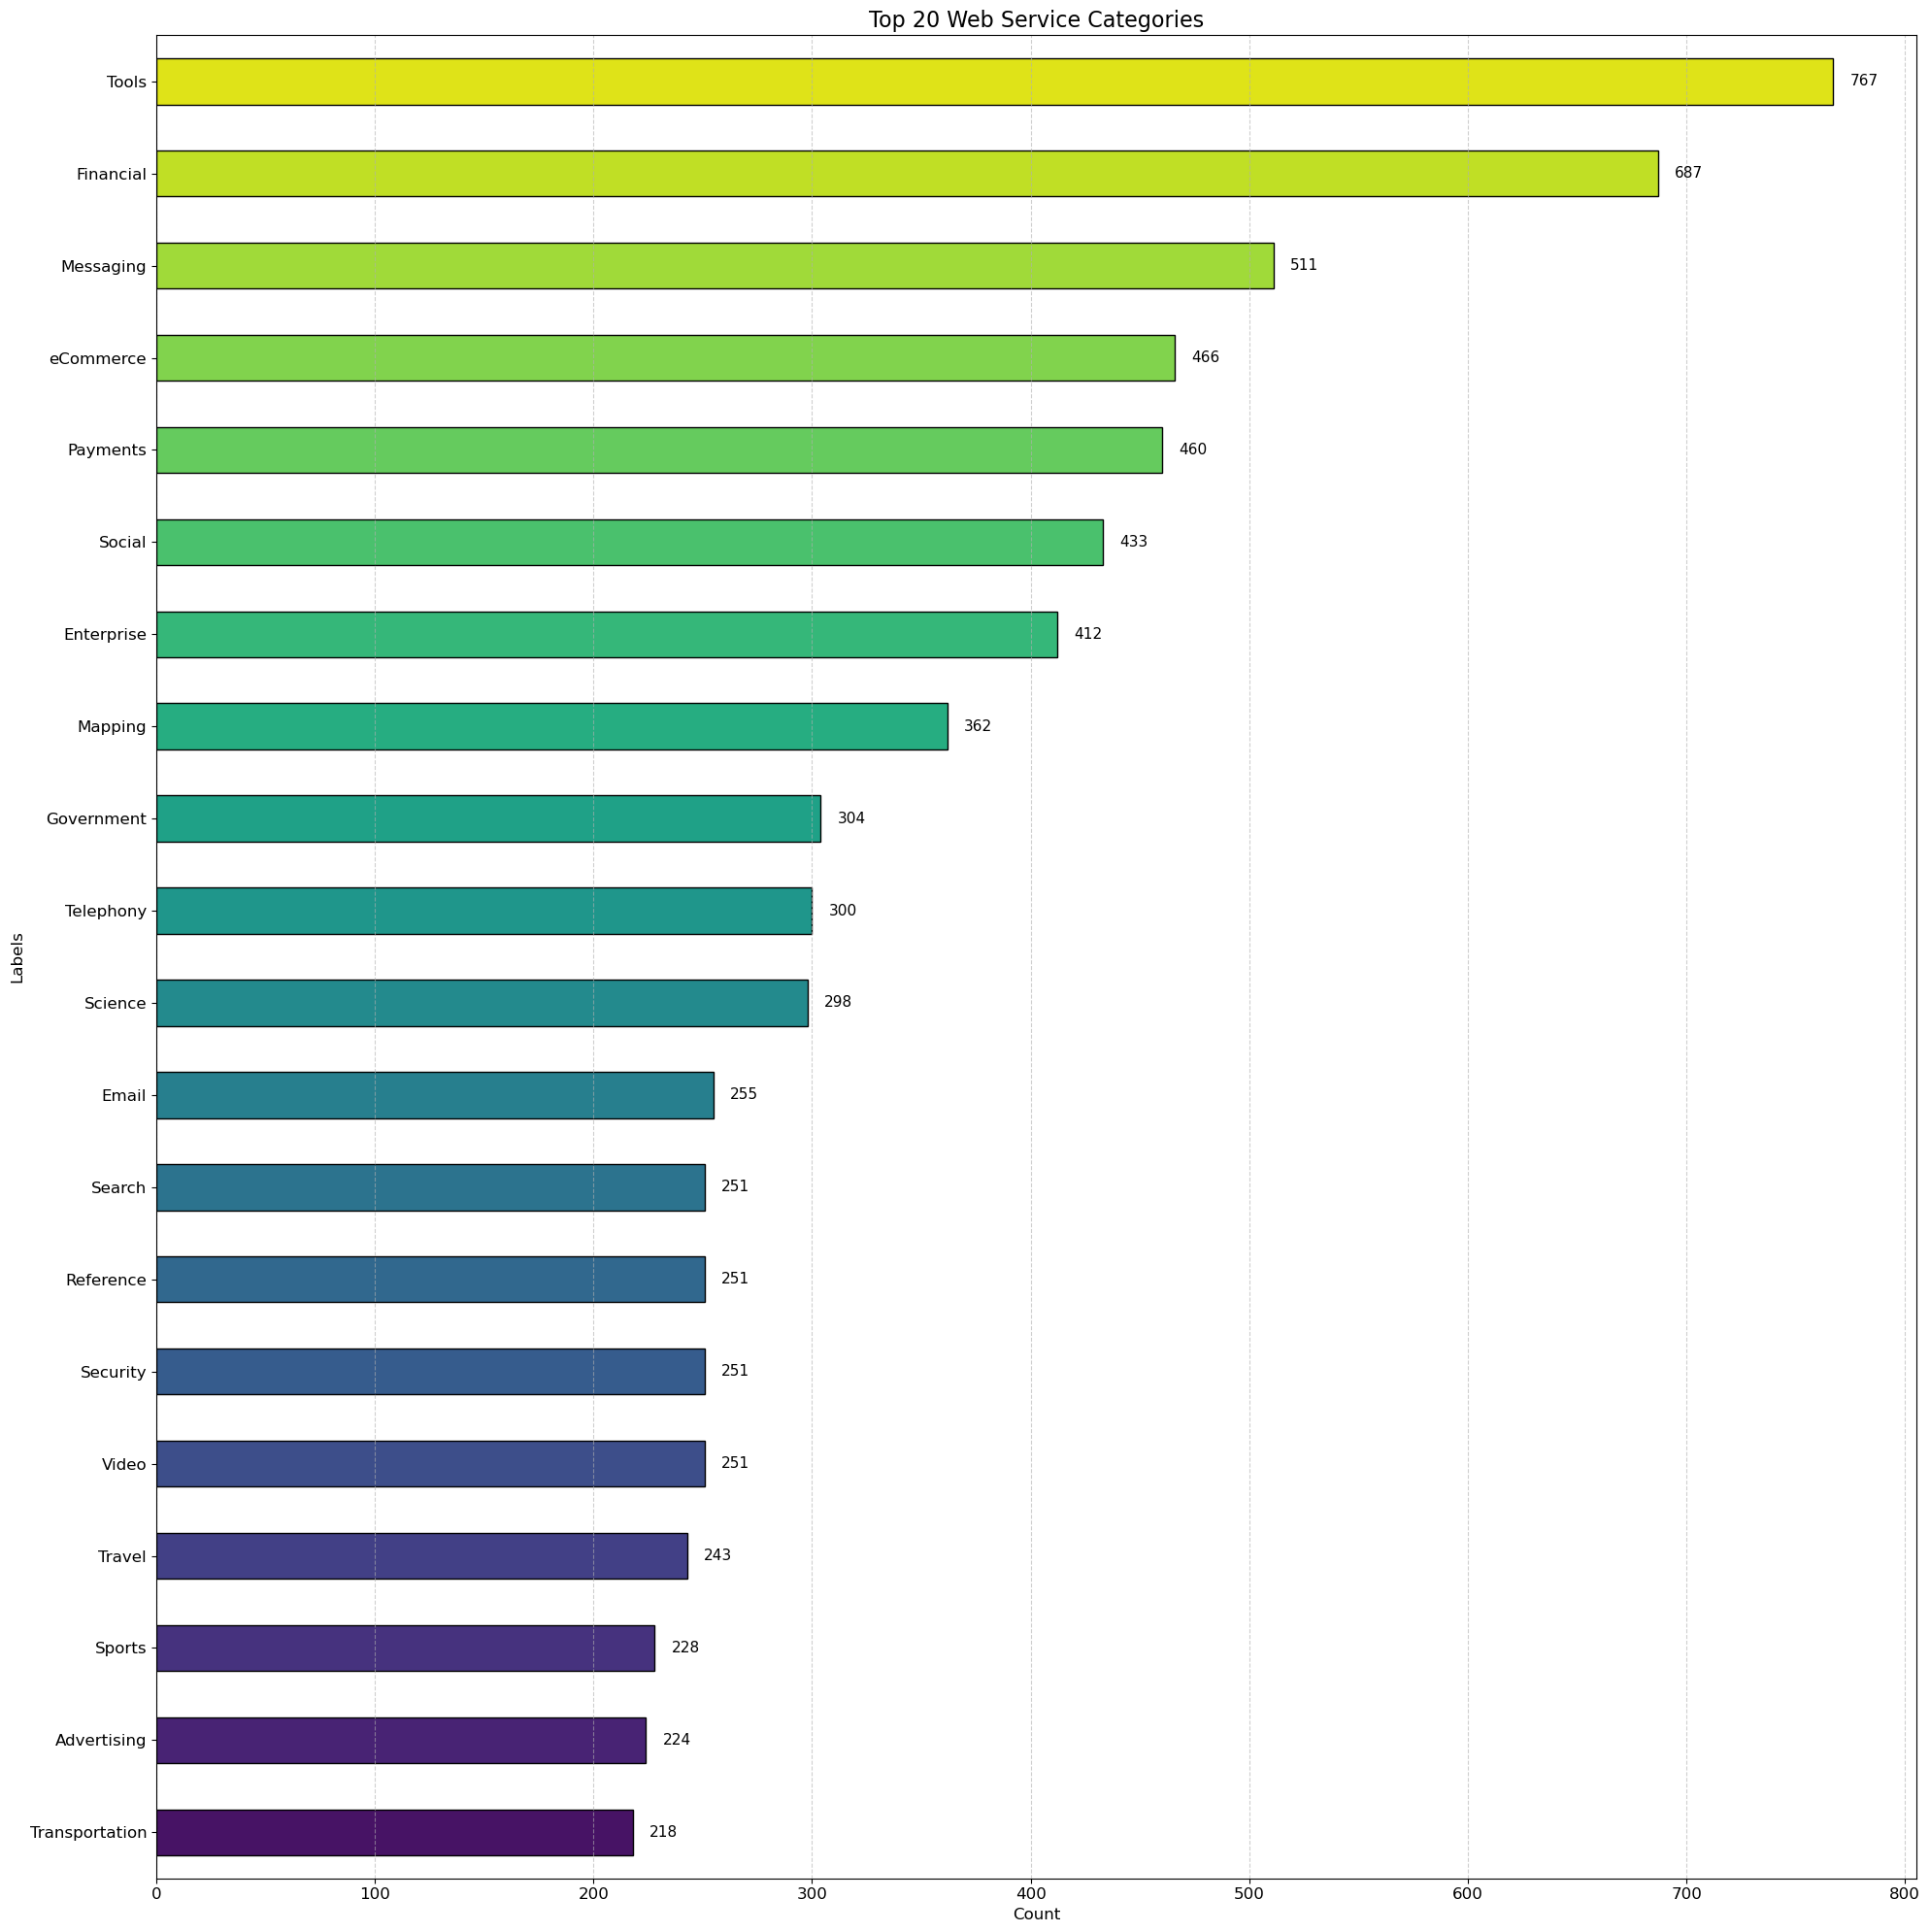

Saved Top 20 Web Service Categories CSV and plot.
Service Classification
Tools                 767
Financial             687
Messaging             511
eCommerce             466
Payments              460
Social                433
Enterprise            412
Mapping               362
Government            304
Telephony             300
Science               298
Email                 255
Video                 251
Security              251
Search                251
Reference             251
Travel                243
Sports                228
Advertising           224
Transportation        218
Education             215
Games                 203
Music                 193
Photos                185
Cloud                 173
Other                 158
Bitcoin               143
Project Management    142
Data                  142
Database              136
Name: count, dtype: int64


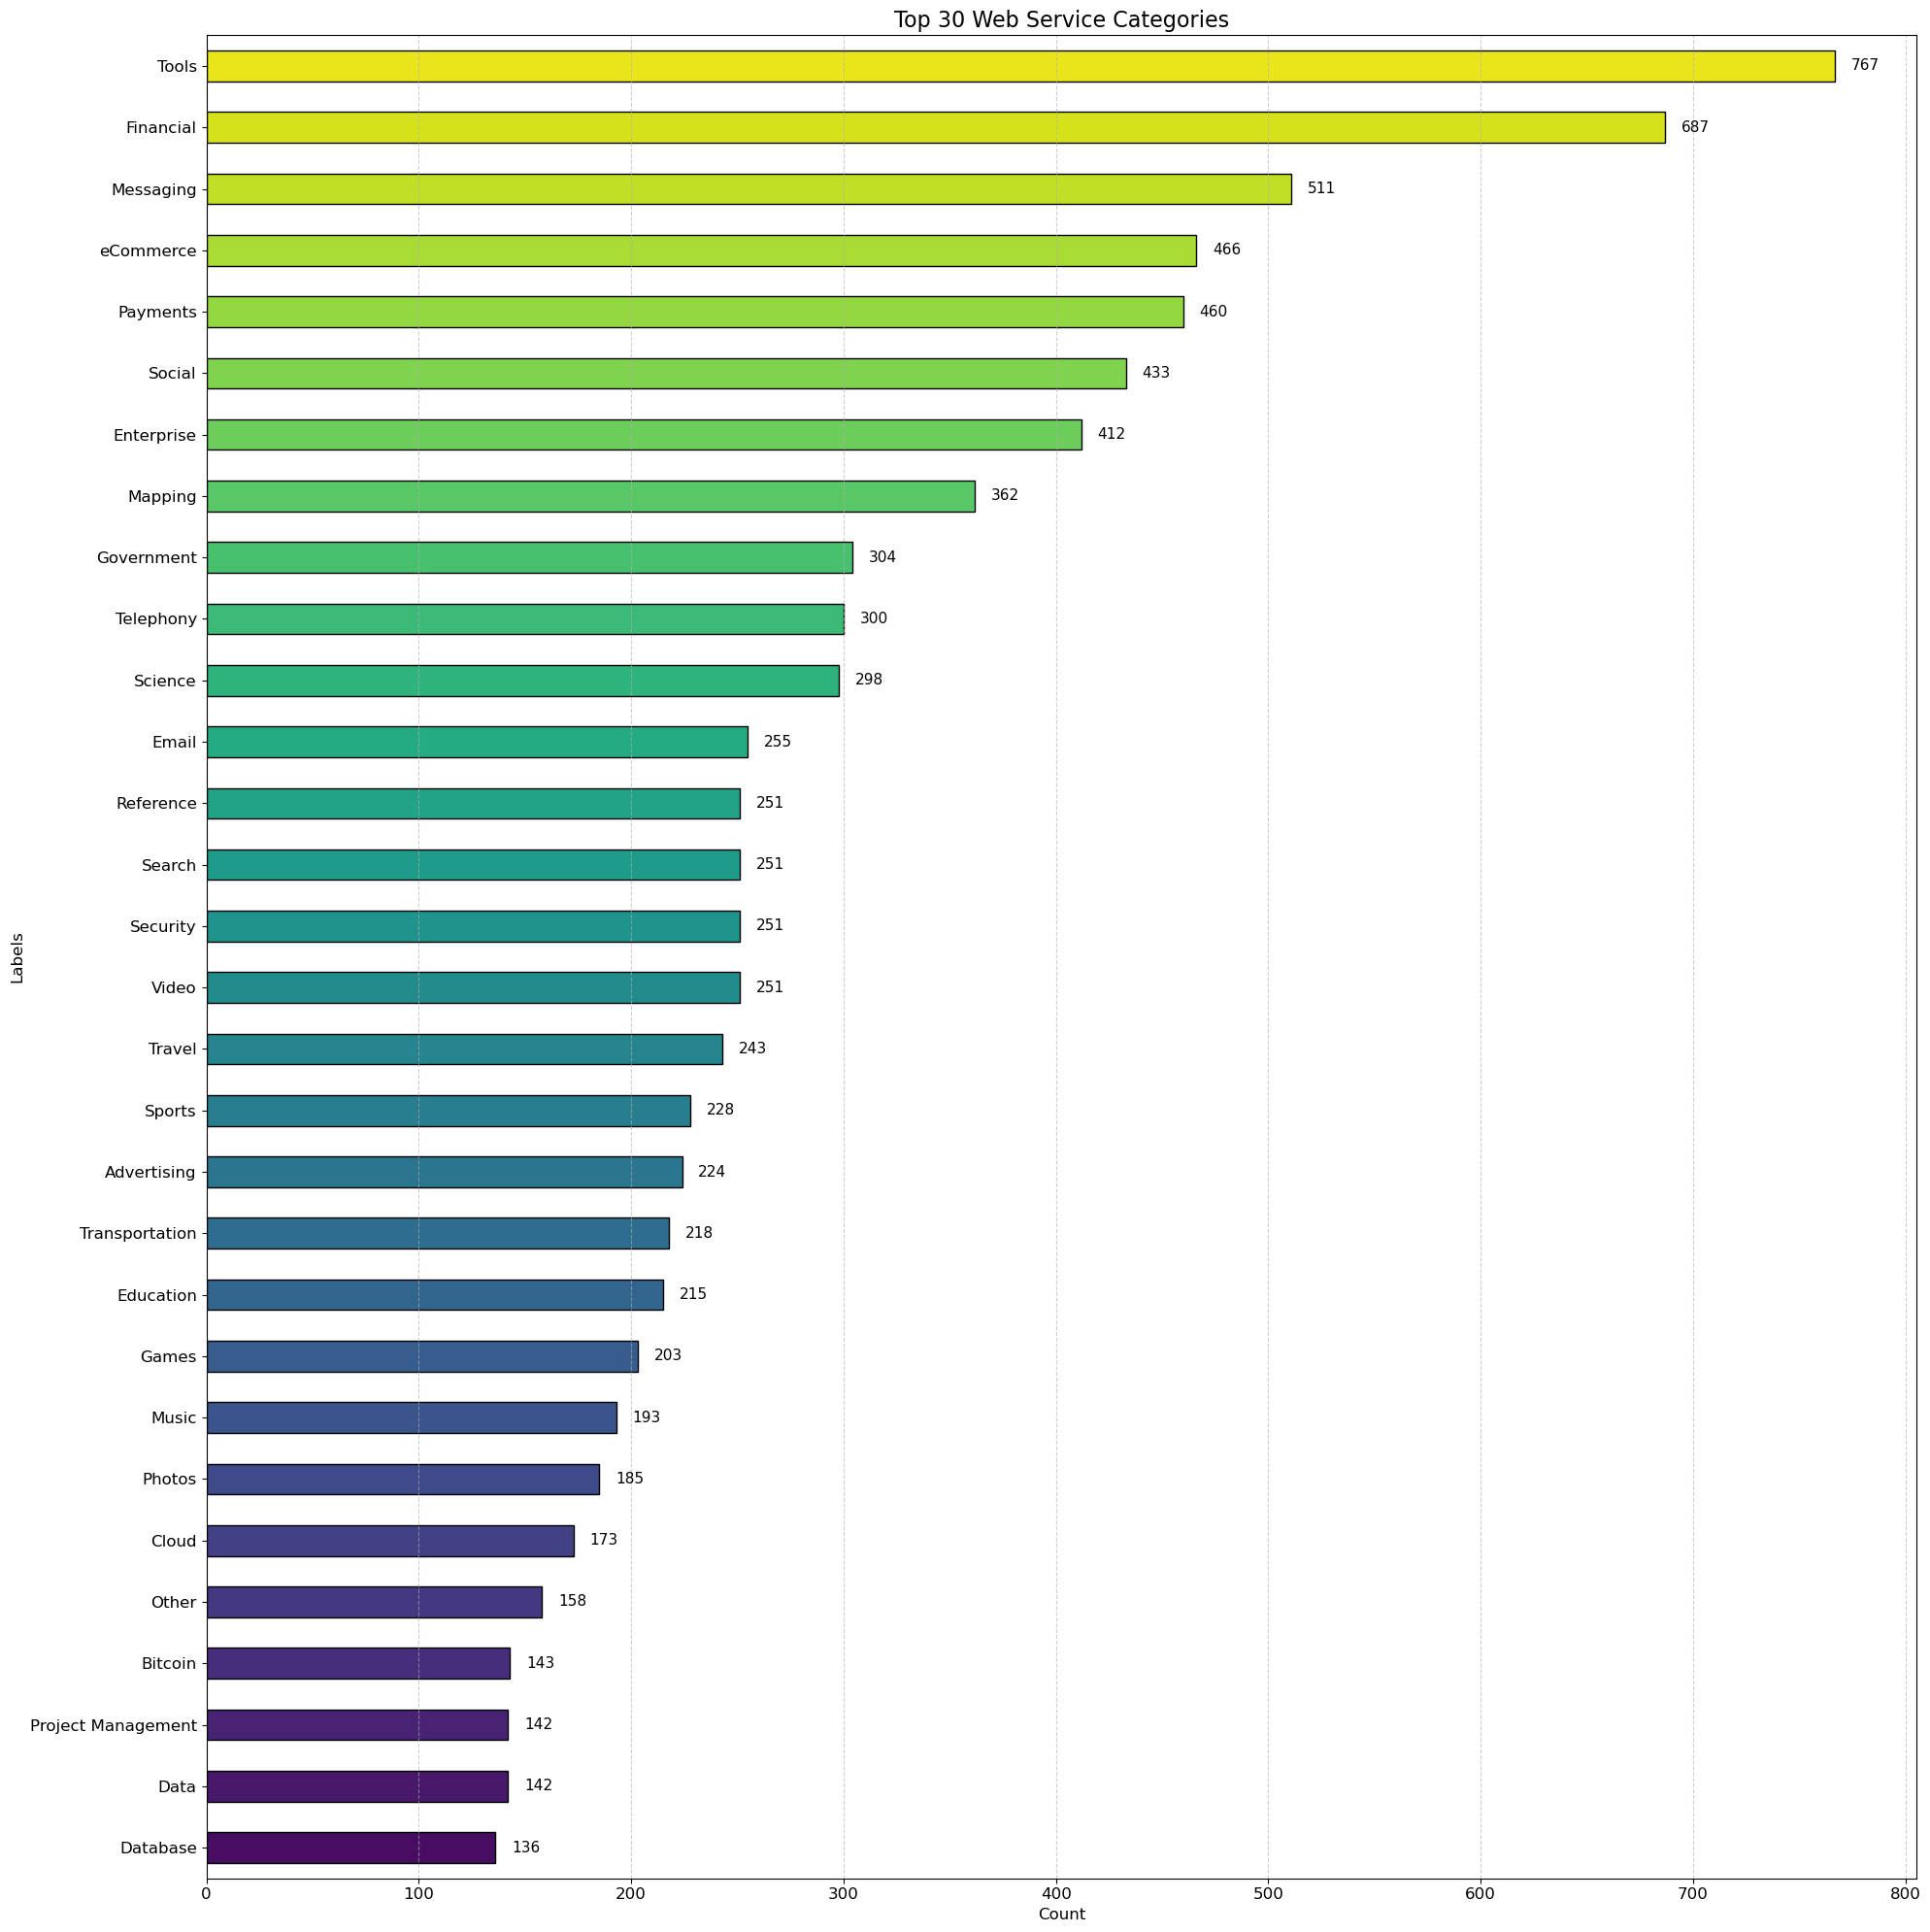

Saved Top 30 Web Service Categories CSV and plot.
Service Classification
Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Security                   251
Video                      251
Search                     251
Reference                  251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      193
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Data                       142
Project Management         142
Database                   1

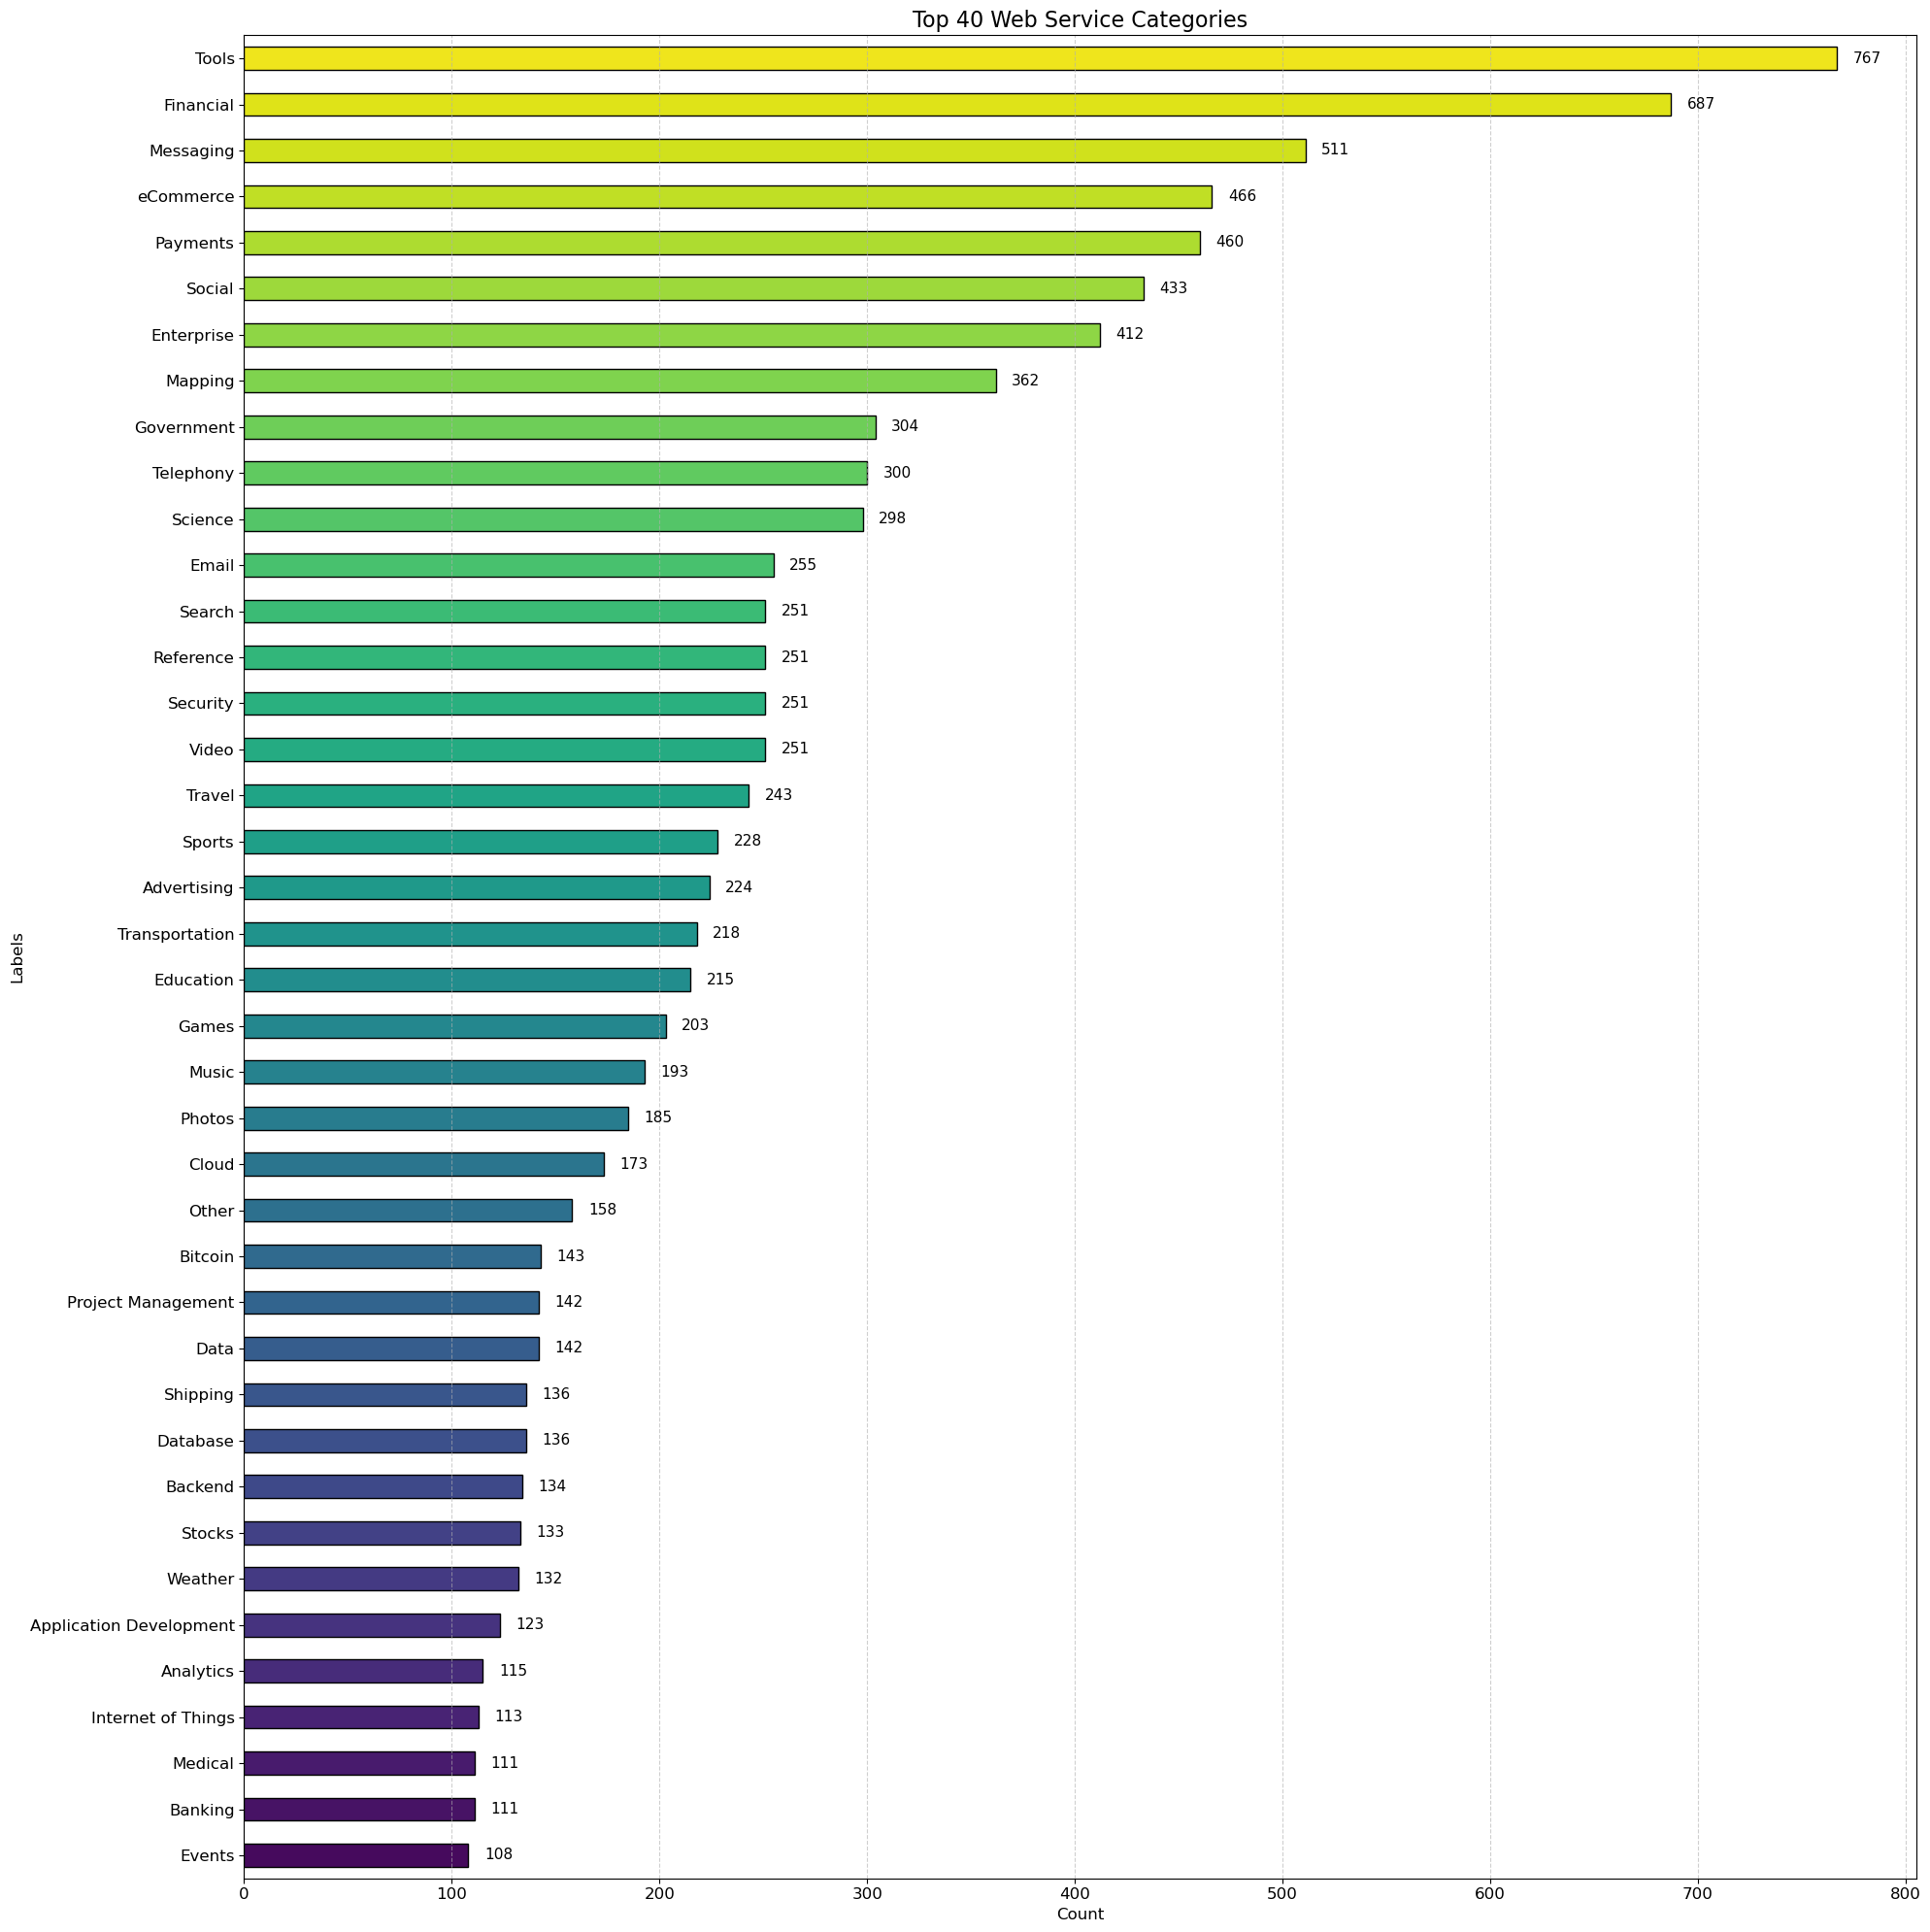

Saved Top 40 Web Service Categories CSV and plot.
Service Classification
Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Search                     251
Reference                  251
Security                   251
Video                      251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      193
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Data                       142
Project Management         142
Shipping                   1

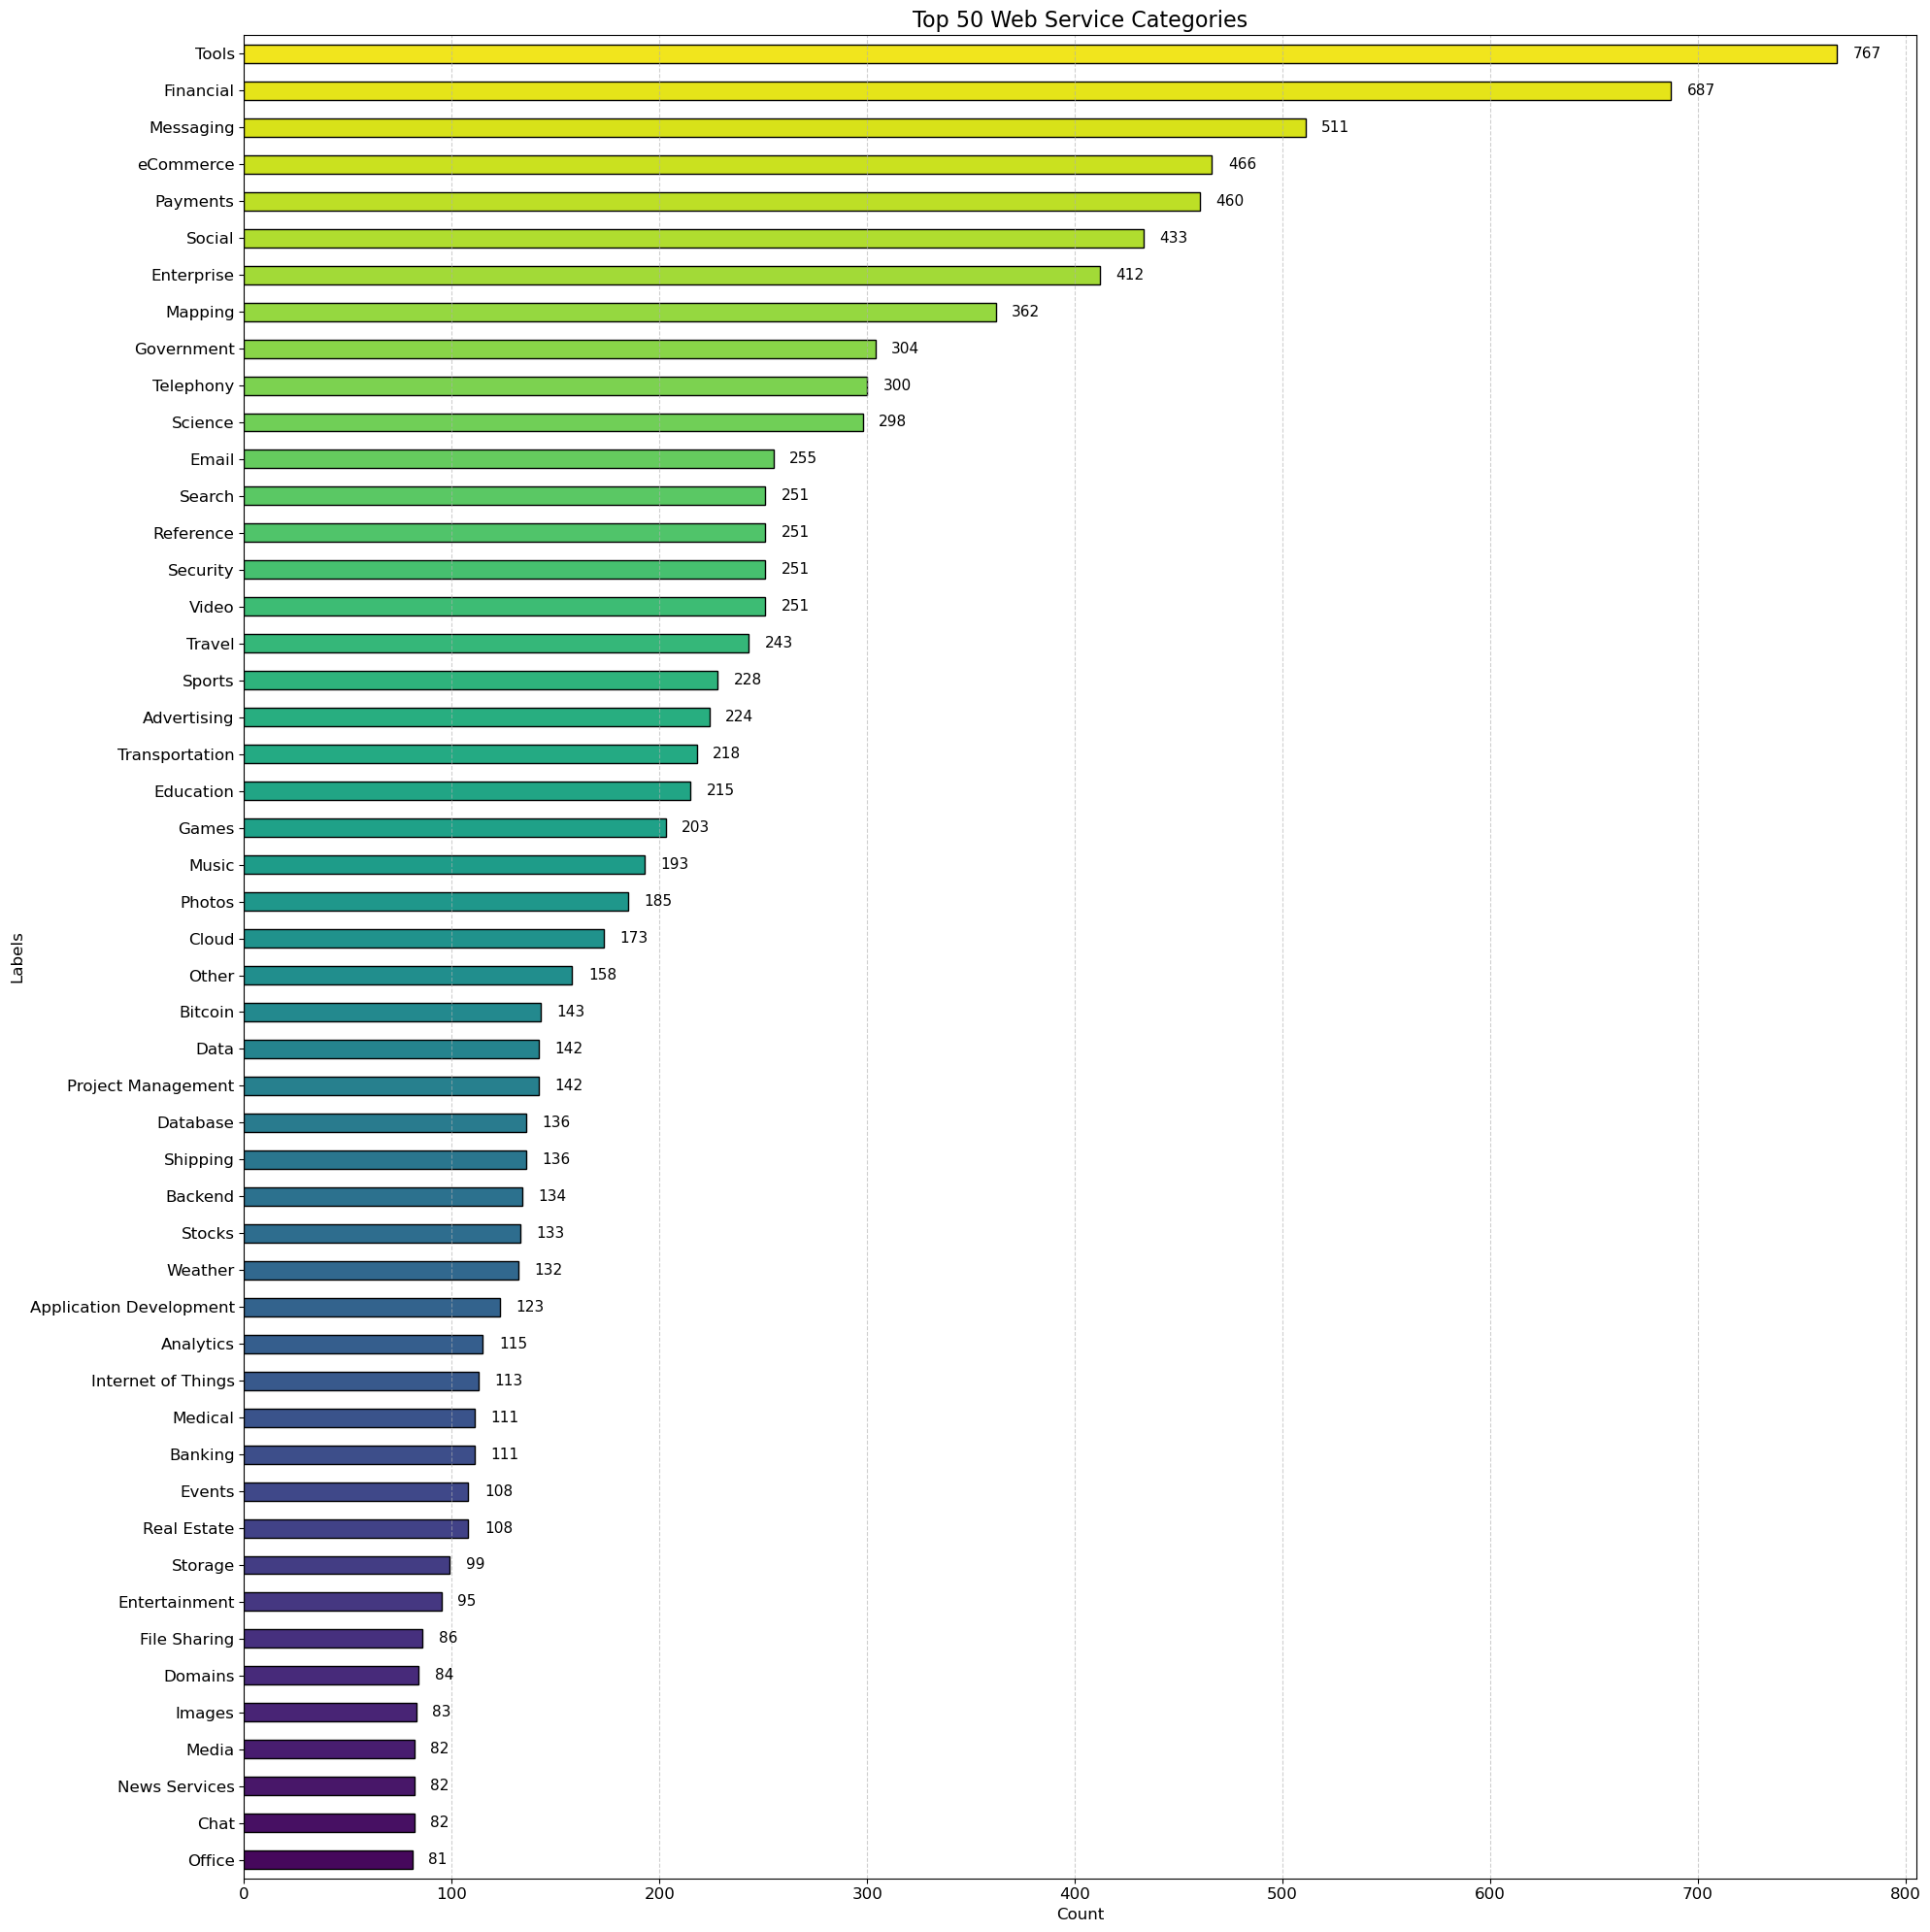

Saved Top 50 Web Service Categories CSV and plot.


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


def return_json_from_txt(txt_path):
    '''return the json data for the given txt file'''
    with open(txt_path, encoding='utf-8') as file:
        raw = file.read()
        data = json.loads(raw, strict=False)
    return data


def extract_web_service_description_category(data, desc_key='Description', cat_key='PrimaryCategory'):
    '''with extract the columns from given pandas dataframe'''
    df = pd.DataFrame(data)
    df_final = pd.DataFrame(df[[desc_key, cat_key]])
    df_final.columns = ['Service Description', 'Service Classification']
    return df_final


def filter_top_n_web_service_categories(df, label_column='Service Classification', top_n=50):
    '''will filter data frame based on top_n category'''
    label_counts = df[label_column].value_counts()
    top_labels = label_counts.head(top_n).index
    filtered_df = df[df[label_column].isin(top_labels)]
    return filtered_df, label_counts[top_labels]


def save_to_csv(df, output_path):
    '''data frame to csv file saving'''
    df.to_csv(output_path, encoding='utf-8', index=False, header=True)


def plot_web_services_category_distribution(label_counts, title, output_path):
    # Optional: use a better color palette
    colors = sns.color_palette("viridis", len(label_counts))

    plt.figure(figsize=(20, 20))
    ax = label_counts.sort_values().plot(
        kind='barh',
        color=colors,
        fontsize=12,
        edgecolor='black'
    )

    # Add count labels at end of each bar
    for bar in ax.patches:
        plt.text(bar.get_width() + max(label_counts.values) * 0.01,
                 bar.get_y() + bar.get_height() / 2,
                 str(int(bar.get_width())),
                 va='center',
                 fontsize=11,
                 color='black')

    plt.title(title, fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Labels", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()


def process_multiple_top_n_web_services(txt_path, output_dir, top_n_list):
    data = return_json_from_txt(txt_path)
    df = extract_web_service_description_category(data)
    

    os.makedirs(output_dir, exist_ok=True)

    for n in top_n_list:
        filtered_df, label_counts = filter_top_n_web_service_categories(df, top_n=n)
        csv_path = os.path.join(output_dir, f"Top_{n}_Web_Services_Categories.csv")
        plot_path = os.path.join(output_dir, f"Top_{n}_Web_Services_Categories.png")
        print(filtered_df["Service Classification"].value_counts())
        save_to_csv(filtered_df, csv_path)
        plot_web_services_category_distribution(label_counts, f"Top {n} Web Service Categories", plot_path)
        print(f"Saved Top {n} Web Service Categories CSV and plot.")


if __name__ == "__main__":
    input_txt = "ProgrammWebScrapy.txt"
    output_dir = "top_web_services_categories_output"
    top_web_services_category_count_list = [10, 20, 30, 40, 50]
    process_multiple_top_n_web_services(input_txt, output_dir, top_web_services_category_count_list)
